# Context

In [4]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
train_filepath = "train.csv"

train_data = pd.read_csv(train_filepath, index_col="PassengerId", parse_dates=True)

In [7]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assesment

[100000, 100000, 100000, 100000, 96708, 100000, 100000, 95377, 99866, 32134, 99750]


<AxesSubplot:title={'center':'Amount of not NaN values for each colunm'}, ylabel='Values amount'>

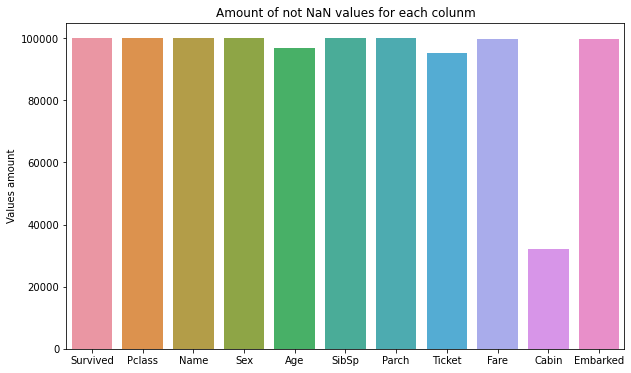

In [15]:

nan_values = [train_data[train_data[col].notna()][col].count() for col in list(train_data.columns)]

print(nan_values)

plt.figure(figsize=(10,6))

plt.title("Amount of not NaN values for each colunm")

plt.ylabel("Values amount")

sns.barplot(x=train_data.columns, y=nan_values)

In [9]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data exploration

In [12]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


In [14]:
train_data.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
99990,1,3,"King, Nancy",female,15.0,0,0,A.5. 356933,10.92,NaN,S
99991,0,1,"Hogan, Todd",male,53.0,0,5,CA 48075,30.09,B19289,Q
99992,1,2,"Cordero, Rita",female,58.0,0,0,4451636,30.53,F12072,C
99993,1,3,"Register, Naomi",female,17.0,0,0,20029,4.06,NaN,S
99994,0,2,"Stevens, Clinton",male,36.0,0,0,41343,12.14,NaN,S
99995,1,2,"Bell, Adele",female,62.0,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.0,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.0,0,0,NaN,9.95,NaN,S
99998,0,3,"Caughlin, Thomas",male,51.0,0,1,458654,30.92,NaN,S


In [79]:
train_data.Survived.describe()

count    100000.000000
mean          0.427740
std           0.494753
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Survived, dtype: float64

<AxesSubplot:title={'center':'Survived'}, ylabel='Values amount'>

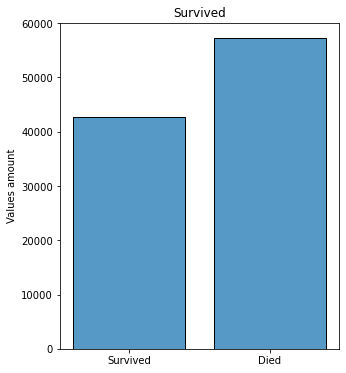

In [67]:
def surv(row):
    if row.Survived == 1:
        return 'Survived'
    else:
        return 'Died'
plt.figure(figsize=(5,6))

plt.title("Survived")

plt.ylabel("Values amount")
sns.histplot(data=train_data.apply(surv, axis=1), shrink=.8)

In [81]:
train_data.Pclass.describe()

count    100000.000000
mean          2.106910
std           0.837727
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: Pclass, dtype: float64

<AxesSubplot:title={'center':'Passenger classes'}, xlabel='Pclass', ylabel='Values amount'>

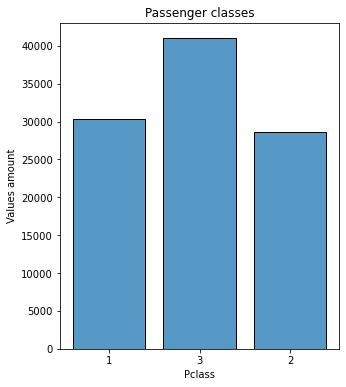

In [74]:
plt.figure(figsize=(5,6))

plt.title("Passenger classes")

plt.ylabel("Values amount")
sns.histplot(data = train_data.Pclass.astype(str), shrink=0.8)

<AxesSubplot:title={'center':'Survives per classes'}, xlabel='Pclass', ylabel='Values amount'>

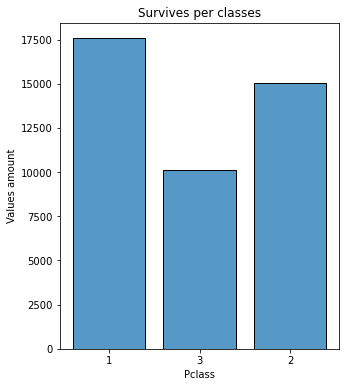

In [75]:
plt.figure(figsize=(5,6))

plt.title("Survives per classes")

plt.ylabel("Values amount")

sns.histplot(data = train_data[train_data.Survived == 1].Pclass.astype(str), shrink=0.8)

In [82]:
train_data.Sex.describe()

count     100000
unique         2
top         male
freq       56114
Name: Sex, dtype: object

<AxesSubplot:title={'center':'Men and women count'}, xlabel='Sex', ylabel='Values amount'>

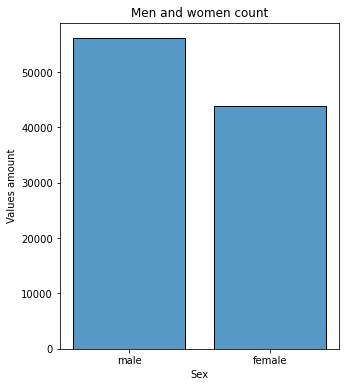

In [23]:

plt.figure(figsize=(10,6))

plt.title("Men and women count")

plt.ylabel("Values amount")

sns.histplot(data=train_data.Sex, shrink=.8)

<AxesSubplot:title={'center':'Men and women survived'}, xlabel='Sex', ylabel='Values amount'>

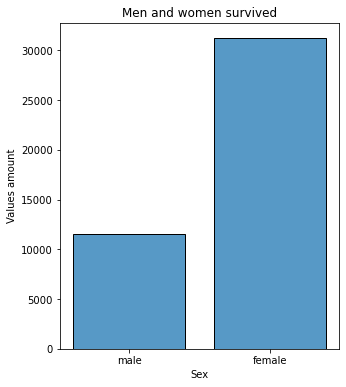

In [57]:
plt.figure(figsize=(5,6))

plt.title("Men and women survived")

plt.ylabel("Values amount")

sns.histplot(data=train_data[train_data.Survived == 1].Sex, shrink=.8)

In [83]:
train_data.Survived.describe()

count    100000.000000
mean          0.427740
std           0.494753
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Survived, dtype: float64

<AxesSubplot:title={'center':'Age'}, xlabel='Age', ylabel='Values amount'>

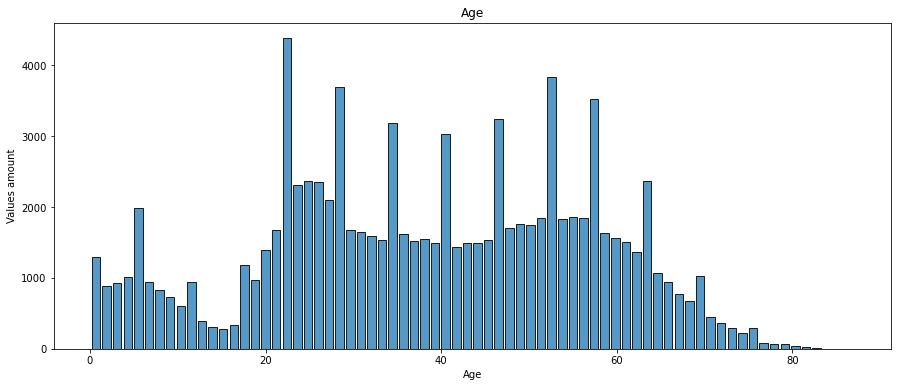

In [42]:
plt.figure(figsize=(15,6))

plt.title("Age")

plt.ylabel("Values amount")

sns.histplot(data=train_data.Age, shrink=.8)

<AxesSubplot:title={'center':'Age'}, xlabel='Age', ylabel='Values amount'>

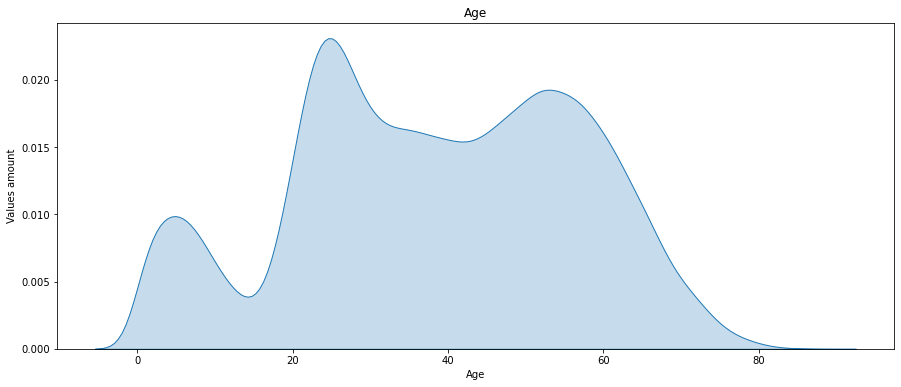

In [51]:
plt.figure(figsize=(15,6))

plt.title("Age")

plt.ylabel("Values amount")

sns.kdeplot(data=train_data['Age'], shade=True)

<AxesSubplot:title={'center':'Age'}, xlabel='Age', ylabel='Values amount'>

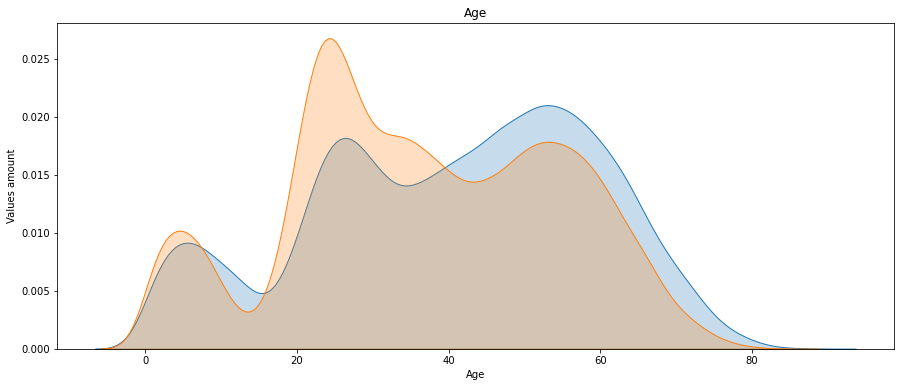

In [54]:
plt.figure(figsize=(15,6))

plt.title("Survivid and died per age")

plt.ylabel("Values amount")

sns.kdeplot(data=train_data[train_data.Survived == 1].Age, label="Survived", shade=True)
sns.kdeplot(data=train_data[train_data.Survived == 0].Age, label="Died", shade=True)

In [84]:
train_data.Name.describe()

count            100000
unique            92144
top       Johnson, John
freq                 31
Name: Name, dtype: object

In [104]:
#top popular names
train_data.groupby(['Name'])['Name'].count().sort_values(ascending=False).head()

Name
Johnson, John       31
Smith, John         24
Smith, James        24
Johnson, William    22
Smith, Michael      20
Name: Name, dtype: int64

In [107]:
train_data.SibSp.describe()

count    100000.000000
mean          0.397690
std           0.862566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: SibSp, dtype: float64

<AxesSubplot:title={'center':'# of siblings / spouses aboard the Titanic'}, xlabel='SibSp', ylabel='Values amount'>

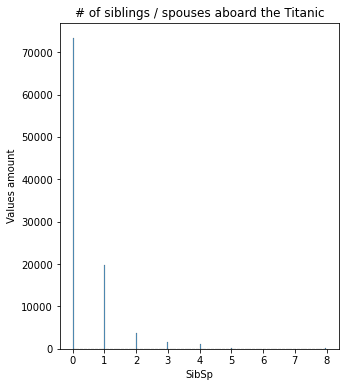

In [109]:
plt.figure(figsize=(5,6))

plt.title("# of siblings / spouses aboard the Titanic")

plt.ylabel("Values amount")

sns.histplot(data=train_data.SibSp, shrink=.8)

In [111]:
train_data.Parch.describe()

count    100000.000000
mean          0.454560
std           0.950076
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: Parch, dtype: float64

In [112]:
train_data.Ticket.describe()

count     95377
unique    75331
top        A/5 
freq        602
Name: Ticket, dtype: object

In [114]:
#top popular names
train_data.groupby(['Ticket'])['Ticket'].count().sort_values(ascending=False).head(10)

Ticket
A/5            602
C.A.           177
SC/PARIS       145
SOTON/O.Q.      80
SC              57
W./C.           53
A/5.            40
W.E.P.          23
CA              22
STON/O2.        21
Name: Ticket, dtype: int64

In [117]:
train_data.Fare.describe()

count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64

<AxesSubplot:title={'center':'Passenger fare'}, xlabel='Fare', ylabel='Values amount'>

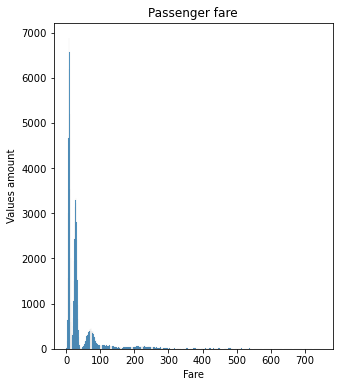

In [118]:
plt.figure(figsize=(5,6))

plt.title("Passenger fare")

plt.ylabel("Values amount")

sns.histplot(data=train_data.Fare, shrink=.8)

In [119]:
#top 10 popular Fares
train_data.groupby(['Fare'])['Fare'].count().sort_values(ascending=False).head(10)

Fare
9.27    87
9.85    87
9.79    86
9.20    85
9.18    83
9.45    83
9.52    82
9.50    82
8.95    82
9.12    82
Name: Fare, dtype: int64

In [121]:
#top 10 unpopular Fares
train_data.groupby(['Fare'])['Fare'].count().sort_values(ascending=False).tail(10)

Fare
136.61    1
136.59    1
136.57    1
136.56    1
136.55    1
136.52    1
136.43    1
136.40    1
136.33    1
744.66    1
Name: Fare, dtype: int64

In [123]:
train_data.Cabin.describe()

count      32134
unique     26992
top       C19828
freq           6
Name: Cabin, dtype: object

In [124]:
#top 10 biggest Cabins
train_data.groupby(['Cabin'])['Cabin'].count().sort_values(ascending=False).head(10)

Cabin
C19828    6
C11139    5
C13699    5
C14534    5
C9485     5
A9127     5
C11283    5
C19623    5
B11110    5
C12152    5
Name: Cabin, dtype: int64

In [126]:
#top 10 save Cabins
train_data[train_data.Survived == 1].groupby(['Cabin'])['Cabin'].count().sort_values(ascending=False).head(10)

Cabin
C19828    5
B18148    5
C13699    5
C17601    4
C9767     4
C19623    4
C21357    4
C14534    4
C13025    4
C20688    4
Name: Cabin, dtype: int64

In [127]:
train_data.Embarked.describe()

count     99750
unique        3
top           S
freq      72139
Name: Embarked, dtype: object

<AxesSubplot:title={'center':'Port of Embarkation'}, xlabel='Embarked', ylabel='Values amount'>

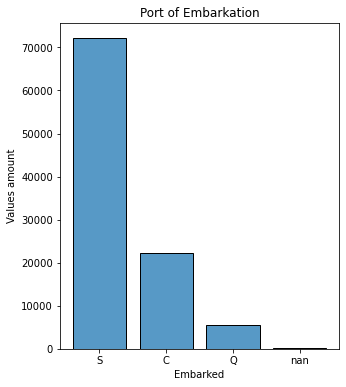

In [129]:
plt.figure(figsize=(5,6))

plt.title("Port of Embarkation")

plt.ylabel("Values amount")

sns.histplot(data = train_data.Embarked.astype(str), shrink=0.8)

<AxesSubplot:>

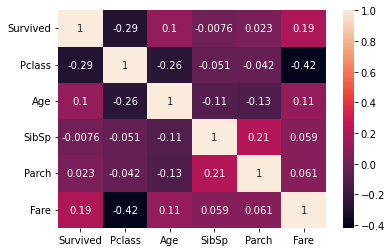

In [46]:
corr_matrix = train_data.corr()

sns.heatmap(corr_matrix, annot=True)

# Summary